# Bike sharing Assignment:

Essentially company wants:
1) Which variables are significant in predicting the demand for shared bikes.
2) To know the accuracy of the model - How well those variables describe the bike demands

Steps to build a multiple linear regression model:
1) Reading,understanding and visualising the data
2) Preparing the data for modelling (train-test split,scaling etc..)
3) Training the model
4) Residual analysis
5) Predictions and evaluation on the test set

In [1]:
#Importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importing libraries from sklearn and statsmodel
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## Step 1.Reading and Understanding the data

In [2]:
#Reading the data
bike = pd.read_csv("day.csv")
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape #No of rows and columns in the dataset

(730, 16)

In [4]:
bike.info() #Checking on datatypes and null values of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe() #Statistical summary of numeric variables

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.dtypes #Data types of all columns

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

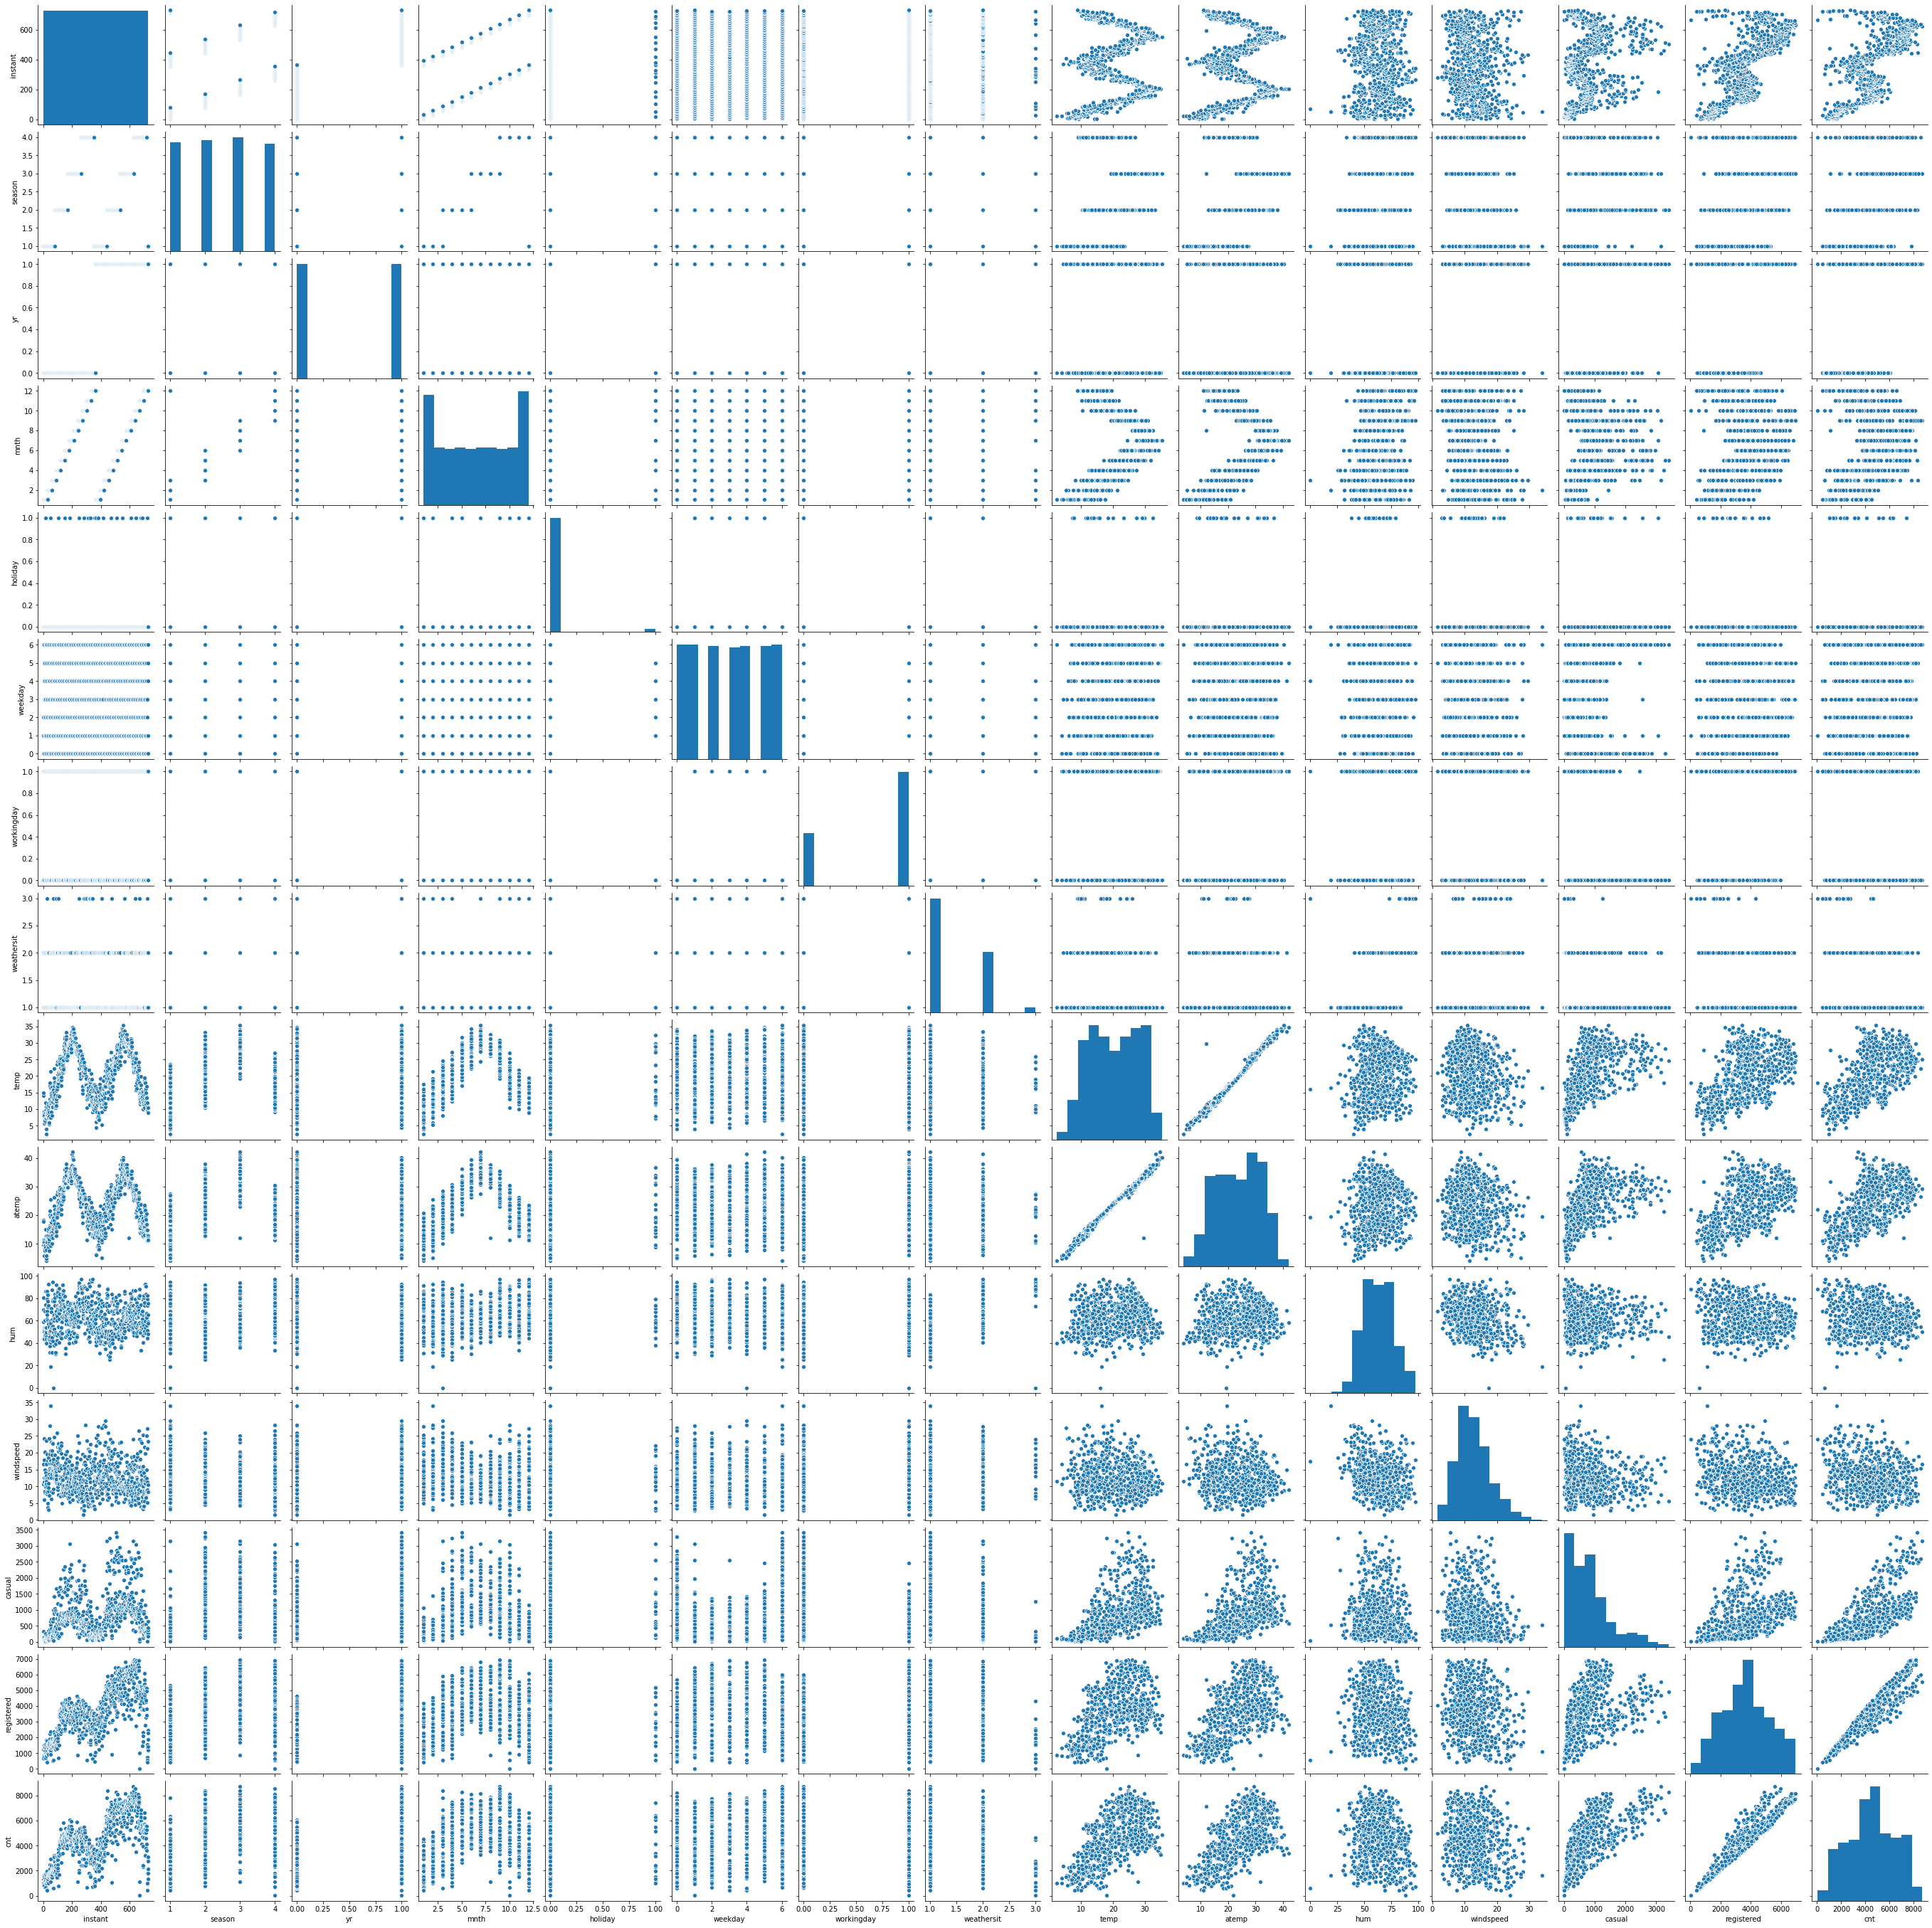

In [7]:
#Visualising all numeric variables
sns.pairplot(bike)
plt.show()

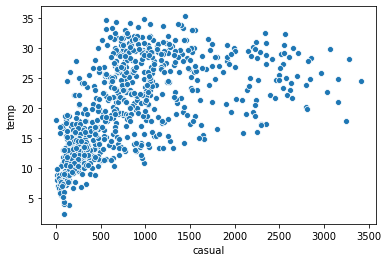

In [8]:
sns.scatterplot(data=bike, x="casual", y="temp")
plt.show()

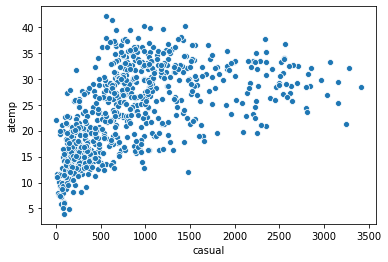

In [9]:
sns.scatterplot(data=bike, x="casual", y="atemp")
plt.show()

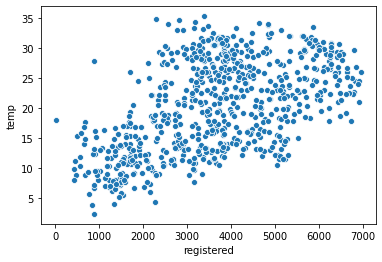

In [10]:
sns.scatterplot(data=bike, x="registered", y="temp")
plt.show()

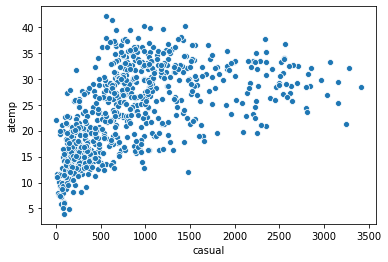

In [11]:
sns.scatterplot(data=bike, x="casual", y="atemp")
plt.show()

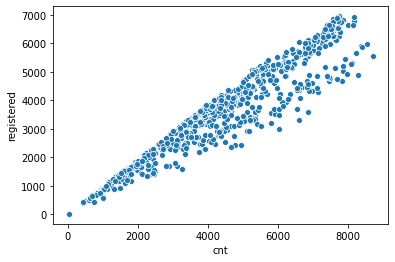

In [12]:
sns.scatterplot(data=bike, x="cnt", y="registered")
plt.show()

From the above pair plot and scatter plots,there are few independent variables which are correlated with 'cnt' (Target) variable,so we should consider a linear regression model. So satisfies one of the assumptions of linear regression states " There is a linear relation between x and y ".

In [13]:
bike.dteday.value_counts() #Value counts of dteday column

01-06-2019    1
30-05-2019    1
04-07-2019    1
09-04-2018    1
27-05-2019    1
             ..
01-09-2018    1
13-04-2018    1
26-02-2019    1
28-07-2018    1
09-01-2018    1
Name: dteday, Length: 730, dtype: int64

In [14]:
#Dropping dteday column as it has unique values and seems to be not helpful for analysis.
#There are other columns where we can derive useful insights. Hence dropping 'dteday'
bike = bike.drop(['dteday'],axis=1)
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## STEP 2 - Preparing the data for modelling

After dropping dteday column, we dont have any categorical variables in the dataset but the specific 
labels associated with weathersit column have no order to them. So we are converting the numeric variables
back to categorical variables using weathersit_map function.

In [15]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
#Function to convert numeric values in weathersit to categorical
def weathersit_map(x):
    return x.map({1:'Clear',2:'Mist',3:'Lightsnow',4:'Heavyrain'})
#Applying the above function to weathersit column
bike[['weathersit']] = bike[['weathersit']].apply(weathersit_map)


In [17]:
bike.head() #Displays first 5 rows in the bike dataset

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Similarly for season column:
Specific labels associated with season column have no order to them. So we are converting the numeric variables back to categorical variables using season_map function.

In [18]:
#Function to convert numeric variables in season to categorical
def season_map(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})
#Applying the above function to season column.
bike[['season']] = bike[['season']].apply(season_map)

In [19]:
bike.head() #Displays first 5 rows

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
#Creating dummy variables for weathersit
weather = pd.get_dummies(bike['weathersit'])
weather.head()

,Clear,Lightsnow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
#Creating dummy variables for weathersit by dropping the first column
weather = pd.get_dummies(bike['weathersit'],drop_first = True)
weather.head()

,Lightsnow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [22]:
#concat dummy dataframe with original dataframe.
bike = pd.concat([bike,weather],axis=1)
bike

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Lightsnow,Mist
0,1,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,2,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,spring,1,12,0,4,1,Mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,1
726,727,spring,1,12,0,5,1,Mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,1
727,728,spring,1,12,0,6,0,Mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,1
728,729,spring,1,12,0,0,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0


In [23]:
#Creating dummy variables for season
season = pd.get_dummies(bike['season'])
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [24]:
#Creating dummy variables for season by dropping the first column
season = pd.get_dummies(bike['season'],drop_first = True)
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
#concat dummy dataframe with original dataframe.
bike = pd.concat([bike,season],axis=1)
bike


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Lightsnow,Mist,spring,summer,winter
0,1,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,2,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,3,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,spring,1,12,0,4,1,Mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,1,1,0,0
726,727,spring,1,12,0,5,1,Mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,1,1,0,0
727,728,spring,1,12,0,6,0,Mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,1,1,0,0
728,729,spring,1,12,0,0,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0,1,0,0


In [26]:
#Dropping season and weathersit as we made dummy variables to both of them and inorder not to encourage redundancy.
bike = bike.drop(['season','weathersit'],axis=1)
bike

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Lightsnow,Mist,spring,summer,winter
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,2,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,3,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,1,1,0,0
726,727,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,1,1,0,0
727,728,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,1,1,0,0
728,729,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0,1,0,0


In [27]:
#The variable 'instant' acts more like an index.So index is already present and there is no use of it during analysis.
#Hence dropping it.
bike = bike.drop(['instant'],axis=1)
bike

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Lightsnow,Mist,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,1,1,0,0
726,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,1,1,0,0
727,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,1,1,0,0
728,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,0,1,0,0


In [28]:
#Dropping casual and registered users as we have 'cnt' column for both the casual and registered users.
bike = bike.drop(['casual','registered'],axis=1)
bike

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Lightsnow,Mist,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,11.33210,65.2917,23.458911,2114,0,1,1,0,0
726,1,12,0,5,1,10.386653,12.75230,59.0000,10.416557,3095,0,1,1,0,0
727,1,12,0,6,0,10.386653,12.12000,75.2917,8.333661,1341,0,1,1,0,0
728,1,12,0,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,1,0,0


<AxesSubplot:xlabel='atemp', ylabel='temp'>

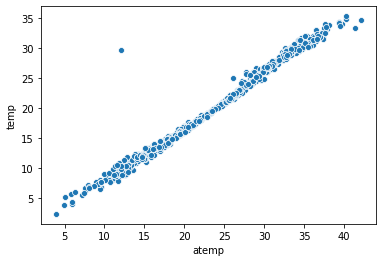

In [30]:
sns.scatterplot(data=bike,x='atemp',y='temp')

In [31]:
#temp and atemp are highly correlated with each other. So dropping atemp variable to reduce redundancy
bike = bike.drop(['atemp'],axis=1)
bike


,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Lightsnow,Mist,spring,summer,winter
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,1,1,0,0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,0,0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,0,1,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,4,1,10.420847,65.2917,23.458911,2114,0,1,1,0,0
726,1,12,0,5,1,10.386653,59.0000,10.416557,3095,0,1,1,0,0
727,1,12,0,6,0,10.386653,75.2917,8.333661,1341,0,1,1,0,0
728,1,12,0,0,0,10.489153,48.3333,23.500518,1796,0,0,1,0,0


In [32]:
#Replacing 'weekday' variable with their corresponding labels because the specific labels associated with weekday column have no order to them.
#So we are converting the numeric variables back to categorical variables using weekday_map function.
def weekday_map(x):
    return x.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
#Applying the above function to weekday column
bike[['weekday']] = bike[['weekday']].apply(weekday_map)


In [33]:
#Creating dummy variables for weathersit by dropping the first column
weekday = pd.get_dummies(bike['weekday'],drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [34]:
#concat dummy dataframe with original dataframe.
bike = pd.concat([bike,weekday],axis=1)
bike

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Lightsnow,Mist,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,Saturday,0,14.110847,80.5833,10.749882,985,0,1,1,0,0,0,1,0,0,0,0
1,0,1,0,Sunday,0,14.902598,69.6087,16.652113,801,0,1,1,0,0,0,0,1,0,0,0
2,0,1,0,Monday,1,8.050924,43.7273,16.636703,1349,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,Tuesday,1,8.200000,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,0,1,0
4,0,1,0,Wednesday,1,9.305237,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,Thursday,1,10.420847,65.2917,23.458911,2114,0,1,1,0,0,0,0,0,1,0,0
726,1,12,0,Friday,1,10.386653,59.0000,10.416557,3095,0,1,1,0,0,0,0,0,0,0,0
727,1,12,0,Saturday,0,10.386653,75.2917,8.333661,1341,0,1,1,0,0,0,1,0,0,0,0
728,1,12,0,Sunday,0,10.489153,48.3333,23.500518,1796,0,0,1,0,0,0,0,1,0,0,0


In [35]:
#Replacing 'mnth' variable with their corresponding labels:
def mnth_map(x):
    return x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
#Applying the above function to mnth column
bike[['mnth']] = bike[['mnth']].apply(mnth_map)

In [36]:
#Creating dummy variables for weathersit by dropping the first column
mnth = pd.get_dummies(bike['mnth'],drop_first = True)
mnth.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [37]:
#concat dummy dataframe with original dataframe.
bike = pd.concat([bike,mnth],axis=1)
bike

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Lightsnow,...,December,February,January,July,June,March,May,November,October,September
0,0,January,0,Saturday,0,14.110847,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,0,January,0,Sunday,0,14.902598,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,January,0,Monday,1,8.050924,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,January,0,Tuesday,1,8.200000,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,0,0,0
4,0,January,0,Wednesday,1,9.305237,43.6957,12.522300,1600,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,December,0,Thursday,1,10.420847,65.2917,23.458911,2114,0,...,1,0,0,0,0,0,0,0,0,0
726,1,December,0,Friday,1,10.386653,59.0000,10.416557,3095,0,...,1,0,0,0,0,0,0,0,0,0
727,1,December,0,Saturday,0,10.386653,75.2917,8.333661,1341,0,...,1,0,0,0,0,0,0,0,0,0
728,1,December,0,Sunday,0,10.489153,48.3333,23.500518,1796,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
#Dropping mnth and weekday columns to make sure we remove the redundant columns. Already created dummy variables for these both columns.
bike = bike.drop(['mnth','weekday'],axis=1)
bike

,yr,holiday,workingday,temp,hum,windspeed,cnt,Lightsnow,Mist,spring,...,December,February,January,July,June,March,May,November,October,September
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,0,1,1,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,10.386653,59.0000,10.416557,3095,0,1,1,...,1,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,75.2917,8.333661,1341,0,1,1,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,1,...,1,0,0,0,0,0,0,0,0,0


#### Train-test set split

In [39]:
#Splitting of train and test sets
df_train,df_test= train_test_split(bike,train_size = 0.7,random_state=100)

In [40]:
df_train.shape #Shape of the train set after splitting

(510, 29)

In [41]:
df_test.shape #Shape of test set after splitting

(220, 29)

#### Re-scaling the features

In [42]:
#1.Instantiate an object:
scaler = MinMaxScaler()
#2.Create a list of numeric variables:
num_vars = ['temp','hum','windspeed','cnt']

In [43]:
#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Lightsnow,Mist,spring,...,December,February,January,July,June,March,May,November,October,September
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train[num_vars].describe() #Statistical summary of numerical variables

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## Step 3 - Training the model

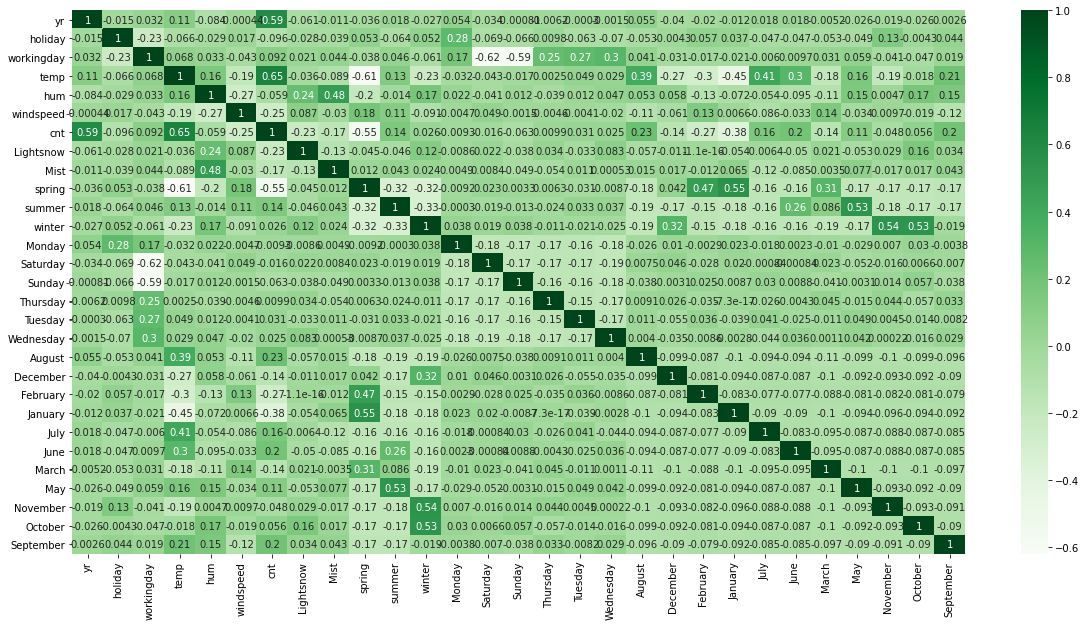

In [45]:
#Plotting a heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df_train.corr(),annot=True,cmap = 'Greens')
plt.show()



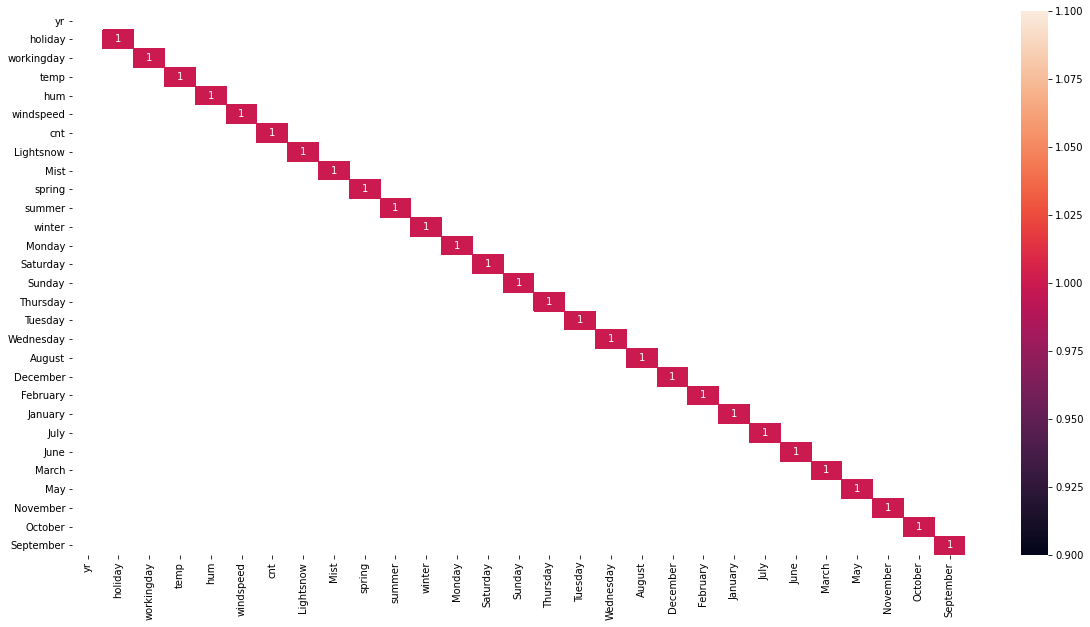

In [47]:
df_train_corr = df_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_train_corr[(df_train_corr.iloc[:,1:]>=0.7) | (df_train_corr.iloc[:,1:]<= -0.7)],annot=True)
plt.show()

There are two ways of approaching the modelling process in multiple linear regression.
1) Start with 1 variable and keep adding each variable to build a model.This process can be time consuming when we have lot of variables.
2) Build a model using all the variables in the dataset and try to improve the model by dropping unnecessary columns( which seems to be insignificant) using RFE and manual elimination process.
As the first process is tidious, we can proceed with the second process.

#### Building a model using all variables


In [50]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'Lightsnow', 'Mist', 'spring', 'summer', 'winter', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

In [51]:
y_train = df_train.pop('cnt') #Contains all the variables in df_train except 'cnt'

In [52]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Lightsnow',
       'Mist', 'spring', 'summer', 'winter', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September'],
      dtype='object')

In [53]:
X_train = df_train #Contains all the variables in df_train

In [54]:
X_train.columns #columns names from X_train

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Lightsnow',
       'Mist', 'spring', 'summer', 'winter', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September'],
      dtype='object')

#### Recursive Feature Elimination (RFE)

In [57]:
#We are using RFE to eliminate few insignificant variables
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [58]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Lightsnow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 10),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11),
 ('August', False, 6),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 12),
 ('September', True, 1)]

In [60]:
support = X_train.columns[rfe.support_] # These are the columns which RFE supports
support

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Lightsnow',
       'Mist', 'spring', 'summer', 'winter', 'Saturday', 'January', 'July',
       'September'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_] #These are the columns which RFE eliminates due to its insignificance.

Index(['Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August',
       'December', 'February', 'June', 'March', 'May', 'November', 'October'],
      dtype='object')

### Building model using statsmodel

In [62]:
#Creating the dataframe with RFE selected variables.
X_train_rfe = X_train[support] 

In [63]:
X_train_rfe.columns # columns names with RFE selected variables

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Lightsnow',
       'Mist', 'spring', 'summer', 'winter', 'Saturday', 'January', 'July',
       'September'],
      dtype='object')

In [64]:
#Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [66]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          4.22e-191
Time:                        17:16:52   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.036      6.969      0.000       0.181       0.323
yr             0.2305      0.008     28.795      0.000       0.215       0.246
holiday       -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday     0.0433      0.012      3.762      0.000       0.021       0.066
temp           0.5096      0.034     14.837      0.000       0.442       0.577
hum           -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed     -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Lightsnow     -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist          -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring        -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer         0.0508      0.015      3.423      0.001       0.022       0.080
winter         0.0933      0.017      5.403      0.000       0.059       0.127
Saturday       0.0536      0.014      3.694      0.000       0.025       0.082
January       -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July          -0.0529      0.018     -2.931      0.004      -0.088      -0.017
September      0.0814      0.016      4.945      0.000       0.049       0.114
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Computing VIF


In [ ]:
X_train_rfe.columns

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
X_train_rfe

In [ ]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

Now that we have built a model on all the variables and dropped few variables using RFE and
now is the time to drop few variables based on 
1) p-value 
2) Variance-Inflation factor (This checks how collinear the variable is with other variables). 
I am considering both the p-value and VIF values on each variable to arrive at the final model.

In [67]:
#Dropping hum
X_train_new = X_train_rfe.drop(['hum'], axis=1)
X_train_new

,const,yr,holiday,workingday,temp,windspeed,Lightsnow,Mist,spring,summer,winter,Saturday,January,July,September
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,0,0,1,0
426,1.0,1,0,0,0.442393,0.255342,0,1,1,0,0,1,0,0,0
728,1.0,1,0,0,0.245101,0.663106,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,1,0,1,0,0,0
111,1.0,0,0,1,0.345824,0.380981,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,1,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.431816,0,1,0,0,1,1,0,0,0
79,1.0,0,0,1,0.462664,0.529881,0,1,0,1,0,0,0,0,0


In [68]:
X_train_new.shape #Shape of the model after dropping 'hum'

(510, 15)

In [69]:
#Create another model after dropping 'hum'
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          1.60e-188
Time:                        17:18:28   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.520      0.0

In [70]:
#Calculate the VIF's for new model:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,62.01
8,spring,5.03
4,temp,3.63
10,winter,3.44
9,summer,2.62
3,workingday,1.87
11,Saturday,1.77
12,January,1.56
13,July,1.48
14,September,1.29


#### Selecting the values to drop with high VIF and low p-value as there are no other values with high p-value and low VIF combination.



In [71]:
#Dropping 'working' variable as it is having high VIF(>5) with low p-value(<0.05)
X_train_new = X_train_new.drop(['workingday'], axis=1)
X_train_new.shape

(510, 14)

In [72]:
##Create another model after removing 'workingday'
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          2.48e-186
Time:                        17:18:45   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2120      0.030      6.978      0.0

In [73]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,56.16
7,spring,5.03
3,temp,3.63
9,winter,3.43
8,summer,2.62
11,January,1.56
12,July,1.48
13,September,1.29
4,windspeed,1.11
5,Lightsnow,1.05


In [74]:
#Dropping 'Saturday' variable as it is having high VIF(<5) with low p-value(>0.05)
X_train_new = X_train_new.drop(['Saturday'], axis=1)
X_train_new.shape

(510, 13)

In [75]:
##Create another model after removing 'Saturday'
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          8.14e-187
Time:                        17:18:55   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [76]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,55.94
7,spring,5.03
3,temp,3.62
9,winter,3.43
8,summer,2.62
10,January,1.56
11,July,1.48
12,September,1.29
4,windspeed,1.11
5,Lightsnow,1.05


In [77]:
#Dropping 'January' variable as it is having VIF(<5) with p-value(<0.05) but looks insignificant when compared to other variables.
X_train_new = X_train_new.drop(['January'], axis=1)
X_train_new.shape

(510, 12)

In [78]:
##Create another model after removing 'January'
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          5.06e-187
Time:                        17:19:06   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [79]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,52.57
7,spring,4.95
3,temp,3.38
9,winter,3.34
8,summer,2.60
10,July,1.48
11,September,1.29
4,windspeed,1.09
5,Lightsnow,1.05
6,Mist,1.04


In [80]:
#Dropping 'September' variable as it is having VIF(<5) with p-value(<0.05) but looks insignificant when compared to other variables.
X_train_new = X_train_new.drop(['September'], axis=1)
X_train_new.shape

(510, 11)

In [81]:
##Create another model after removing 'September'
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.1
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          6.72e-184
Time:                        17:19:15   Log-Likelihood:                 488.56
No. Observations:                 510   AIC:                            -955.1
Df Residuals:                     499   BIC:                            -908.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2277      0.029      7.732      0.0

In [82]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,50.21
7,spring,4.57
3,temp,3.38
9,winter,3.09
8,summer,2.23
10,July,1.35
4,windspeed,1.09
5,Lightsnow,1.05
6,Mist,1.04
1,yr,1.02


In [83]:
#Dropping 'July' variable as it is having VIF(<5) with p-value(<0.05) but looks insignificant when compared to other variables.
X_train_new = X_train_new.drop(['July'], axis=1)
X_train_new.shape

(510, 10)

In [84]:
##Create another model after removing 'July'
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Tue, 20 Jul 2021   Prob (F-statistic):          2.84e-181
Time:                        17:19:23   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2222      0.030      7.427      0.0

In [85]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,50.11
7,spring,4.49
3,temp,3.30
9,winter,2.97
8,summer,2.04
4,windspeed,1.09
5,Lightsnow,1.05
6,Mist,1.03
1,yr,1.02
2,holiday,1.01


## 4.Residual Analysis on train data

In [86]:
y_train_pred = lm.predict(X_train_lm) #Making predictions on train data

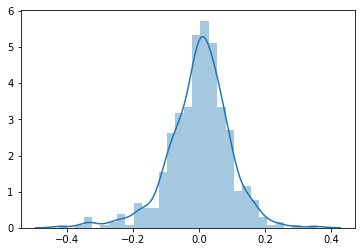

In [87]:
res = y_train-y_train_pred # Distribution of error terms, calculating residuals
sns.distplot(res)
plt.show()

From the above graph, we can infer that the error terms are normally distributed with mean zero

## 5.Prediction and evaluation on test set

In [88]:
#Create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Lightsnow,Mist,spring,...,December,February,January,July,June,March,May,November,October,September
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [89]:
df_test.describe() #Statistical summary of numeric variables

,yr,holiday,workingday,temp,hum,windspeed,cnt,Lightsnow,Mist,spring,...,December,February,January,July,June,March,May,November,October,September
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.027273,0.318182,0.254545,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.163248,0.466833,0.436599,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
#Creating X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
#add a constant to make predictions
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,Lightsnow,Mist,spring,...,December,February,January,July,June,March,May,November,October,September
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
#Just like in train set, i am dropping the same columns in the test set as well.
X_test_sm = X_test_sm.drop(['Monday','Sunday','Thursday','Tuesday','Wednesday','August','December','February','June','March','May','November','October','hum','workingday','Saturday','January','September','July'],axis=1)

In [93]:
X_test_sm.shape  #Shape of the test set

(220, 10)

In [94]:
X_test_sm.columns #Name of the columns in test set

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Lightsnow', 'Mist',
       'spring', 'summer', 'winter'],
      dtype='object')

In [95]:
X_train_new.shape #Shape of the train set

(510, 10)

In [96]:
X_train_new.columns #Name of the columns in trains set

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Lightsnow', 'Mist',
       'spring', 'summer', 'winter'],
      dtype='object')

In [97]:
#Making predictions
y_test_pred = lm.predict(X_test_sm)

In [98]:
#Evaluate
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8013092375478267

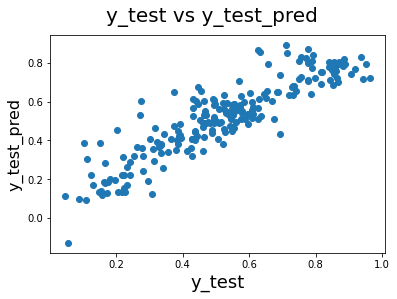

In [100]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                     # Y-label
plt.show()

Final inferences:
1) R-Squared value for the final train model is 82.2% and adjusted R^2 is 81.9%
2) R^2 score for test set is 80.13%
